# Data 319 Group 2 Project

# Research Question:

# Team Members: Carter Timm, Mariah Bergquist, Daunte Dash

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install adjustText

Reading in libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
from adjustText import adjust_text
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
NBA_NC = pd.DataFrame(pd.read_csv("/content/nba_team_stats_00_to_23.csv"))

In [ ]:
NBA_NC.head()

teamstatspk                    Team  games_played  wins  losses  \
0            0          Boston Celtics            82    64      18   
1            1          Denver Nuggets            82    57      25   
2            2   Oklahoma City Thunder            82    57      25   
3            3  Minnesota Timberwolves            82    56      26   
4            4             LA Clippers            82    51      31   

   win_percentage   Min  points  field_goals_made  field_goals_attempted  ...  \
0           0.780  3966    9887              3601                   7396  ...   
1           0.695  3941    9418              3610                   7279  ...   
2           0.695  3961    9847              3653                   7324  ...   
3           0.683  3961    9264              3383                   6974  ...   
4           0.622  3941    9481              3473                   7108  ...   

   rebounds  assists  turnovers  steals  blocks  blocks_attempted  \
0      3799     2207        979     557     538               304   
1      3643     2415       1036     585     456               394   
2      3447     2223       1039     694     538               419   
3      3577     2184       1162     647     497               371   
4      3523     2097       1078     640     413               384   

   personal_fouls  personal_fouls_drawn  plus_minus   season  
0            1326                  1416         930  2023-24  
1            1489                  1467         431  2023-24  
2            1545                  1548         608  2023-24  
3            1544                  1630         529  2023-24  
4            1519                  1537         269  2023-24  

[5 rows x 29 columns]

In [ ]:
NBA_NC.isnull().sum()

teamstatspk                 0
Team                        0
games_played                0
wins                        0
losses                      0
win_percentage              0
Min                         0
points                      0
field_goals_made            0
field_goals_attempted       0
field_goal_percentage       0
three_pointers_made         0
three_pointers_attempted    0
three_point_percentage      0
free_throws_made            0
free_throw_attempted        0
free_throw_percentage       0
offensive_rebounds          0
defensive_rebounds          0
rebounds                    0
assists                     0
turnovers                   0
steals                      0
blocks                      0
blocks_attempted            0
personal_fouls              0
personal_fouls_drawn        0
plus_minus                  0
season                      0
dtype: int64

Cleaning Data

In [ ]:
#average points per game stats, 82 games total
#could be used as a cleaning step
#cleaning: 2023-2024 season dont need other years
#Add win ratio
#Add new column with data per game

NBA_NC = NBA_NC.loc[NBA_NC['season'] == '2023-24']
NBA_NC['PointsPG'] = NBA_NC['points'] / 82
NBA_NC['ReboundsPG'] = NBA_NC['rebounds'] / 82
NBA_NC['AssistsPG'] = NBA_NC['assists'] / 82
NBA_NC['StealsPG'] = NBA_NC['steals'] / 82
NBA_NC['BlocksPG'] = NBA_NC['blocks'] / 82
NBA_NC['TurnoversPG'] = NBA_NC['turnovers'] / 82
NBA_NC['PersonalFoulsPG'] = NBA_NC['personal_fouls'] / 82
NBA_NC['WinRatio'] = NBA_NC['wins'] / 82

NBA = NBA_NC

<ipython-input-7-fcd77b8e1e67>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_NC['PointsPG'] = NBA_NC['points'] / 82
<ipython-input-7-fcd77b8e1e67>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_NC['ReboundsPG'] = NBA_NC['rebounds'] / 82
<ipython-input-7-fcd77b8e1e67>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Exploratory Data Analysis

In [ ]:
NBA.columns

Index(['teamstatspk', 'Team', 'games_played', 'wins', 'losses',
       'win_percentage', 'Min', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season', 'PointsPG',
       'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG', 'TurnoversPG',
       'PersonalFoulsPG', 'WinRatio'],
      dtype='object')

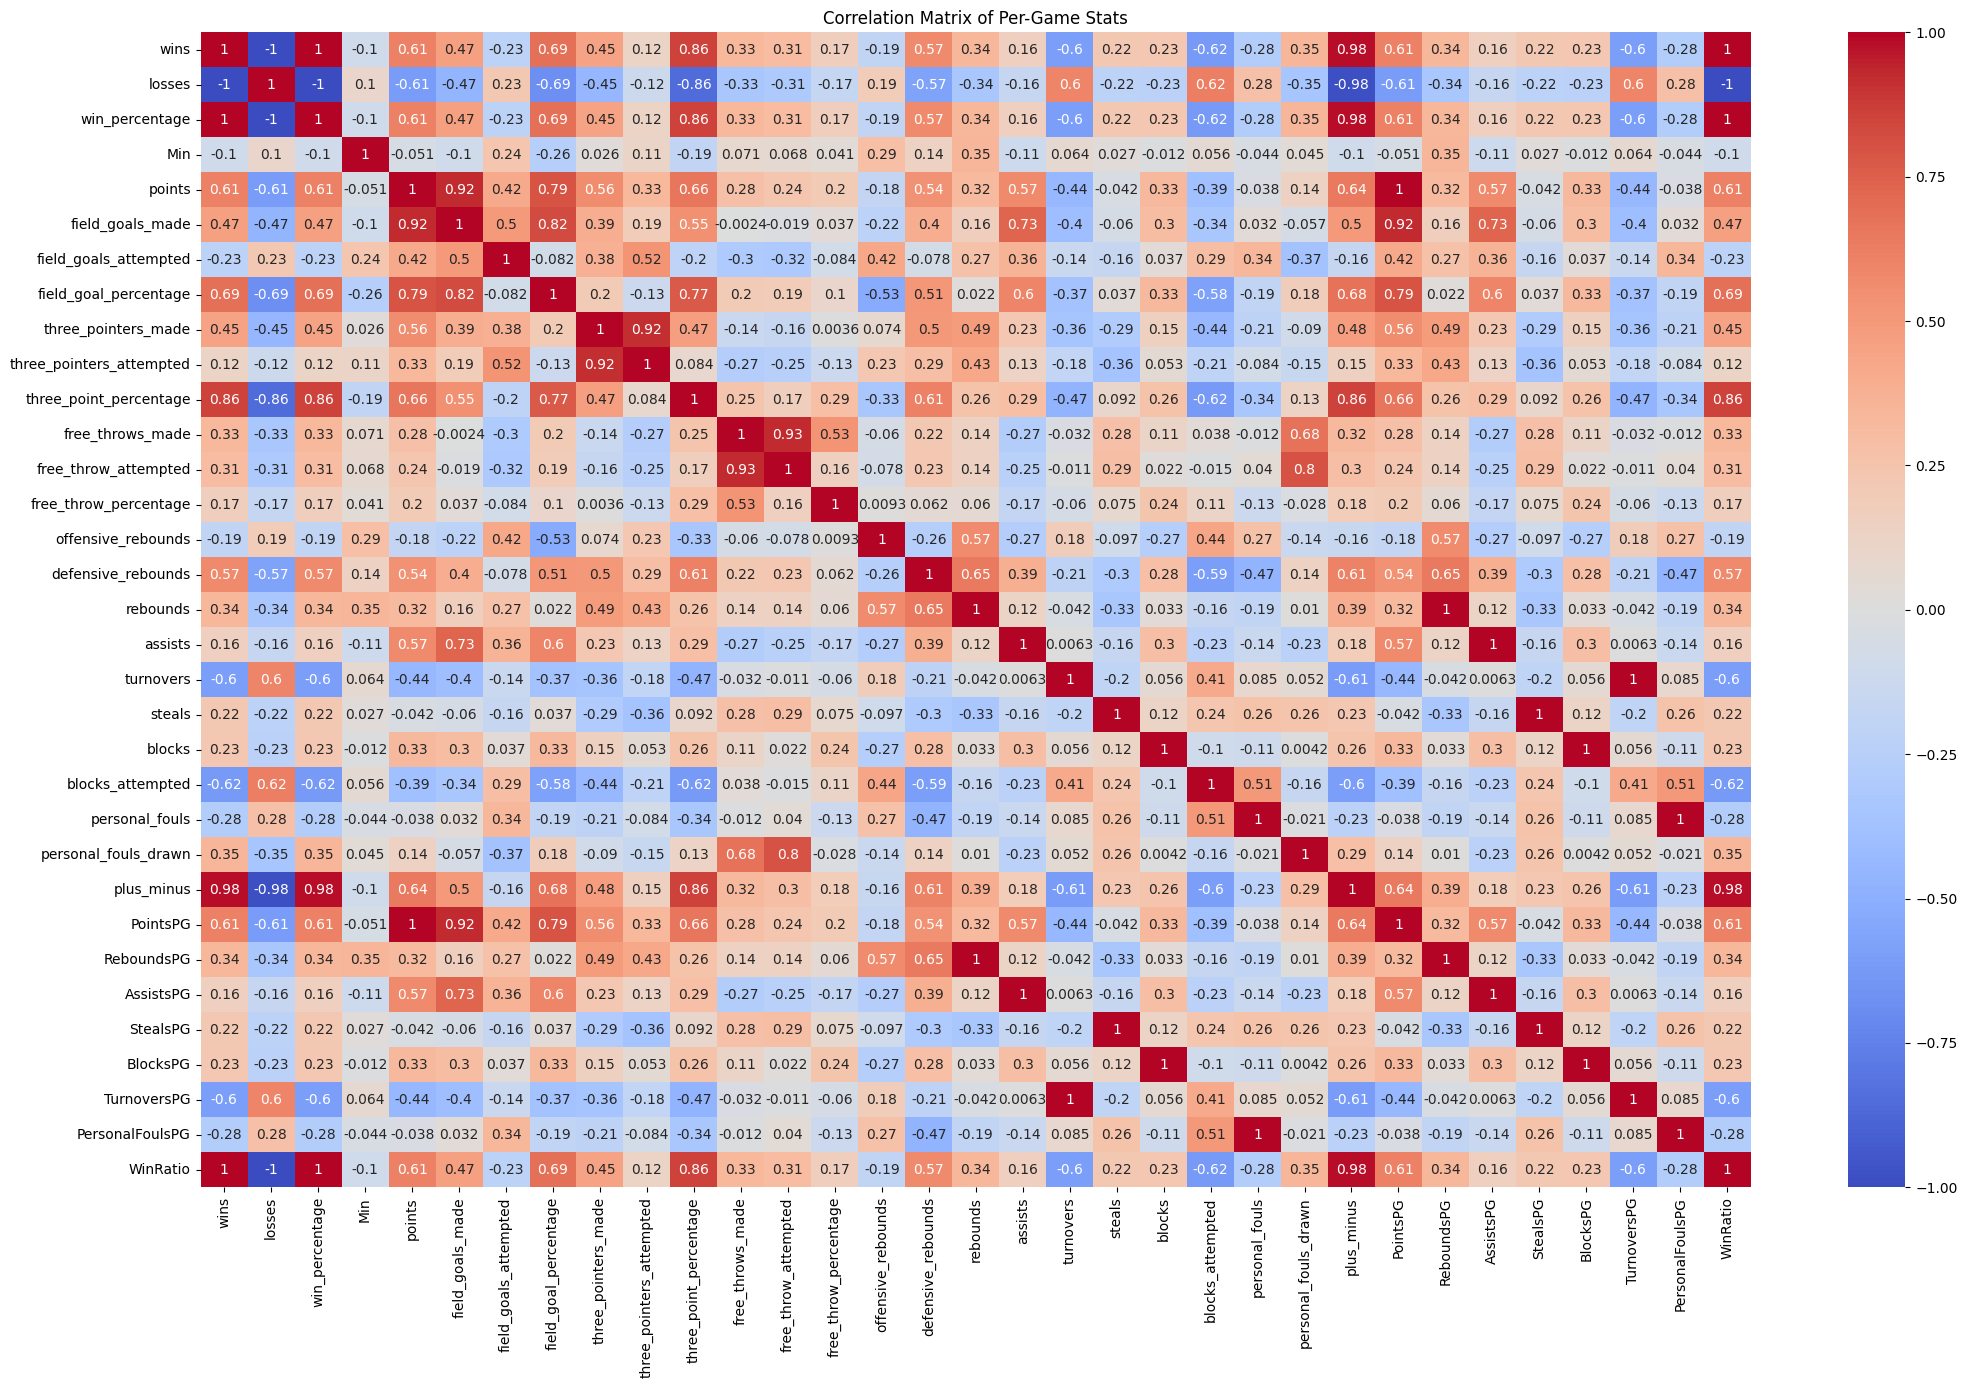

In [ ]:
#correlation matrix per game stats
correlation_matrix = NBA_NC[['wins', 'losses',
       'win_percentage', 'Min', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'PointsPG',
       'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG', 'TurnoversPG',
       'PersonalFoulsPG', 'WinRatio']].corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Per-Game Stats')
plt.show()


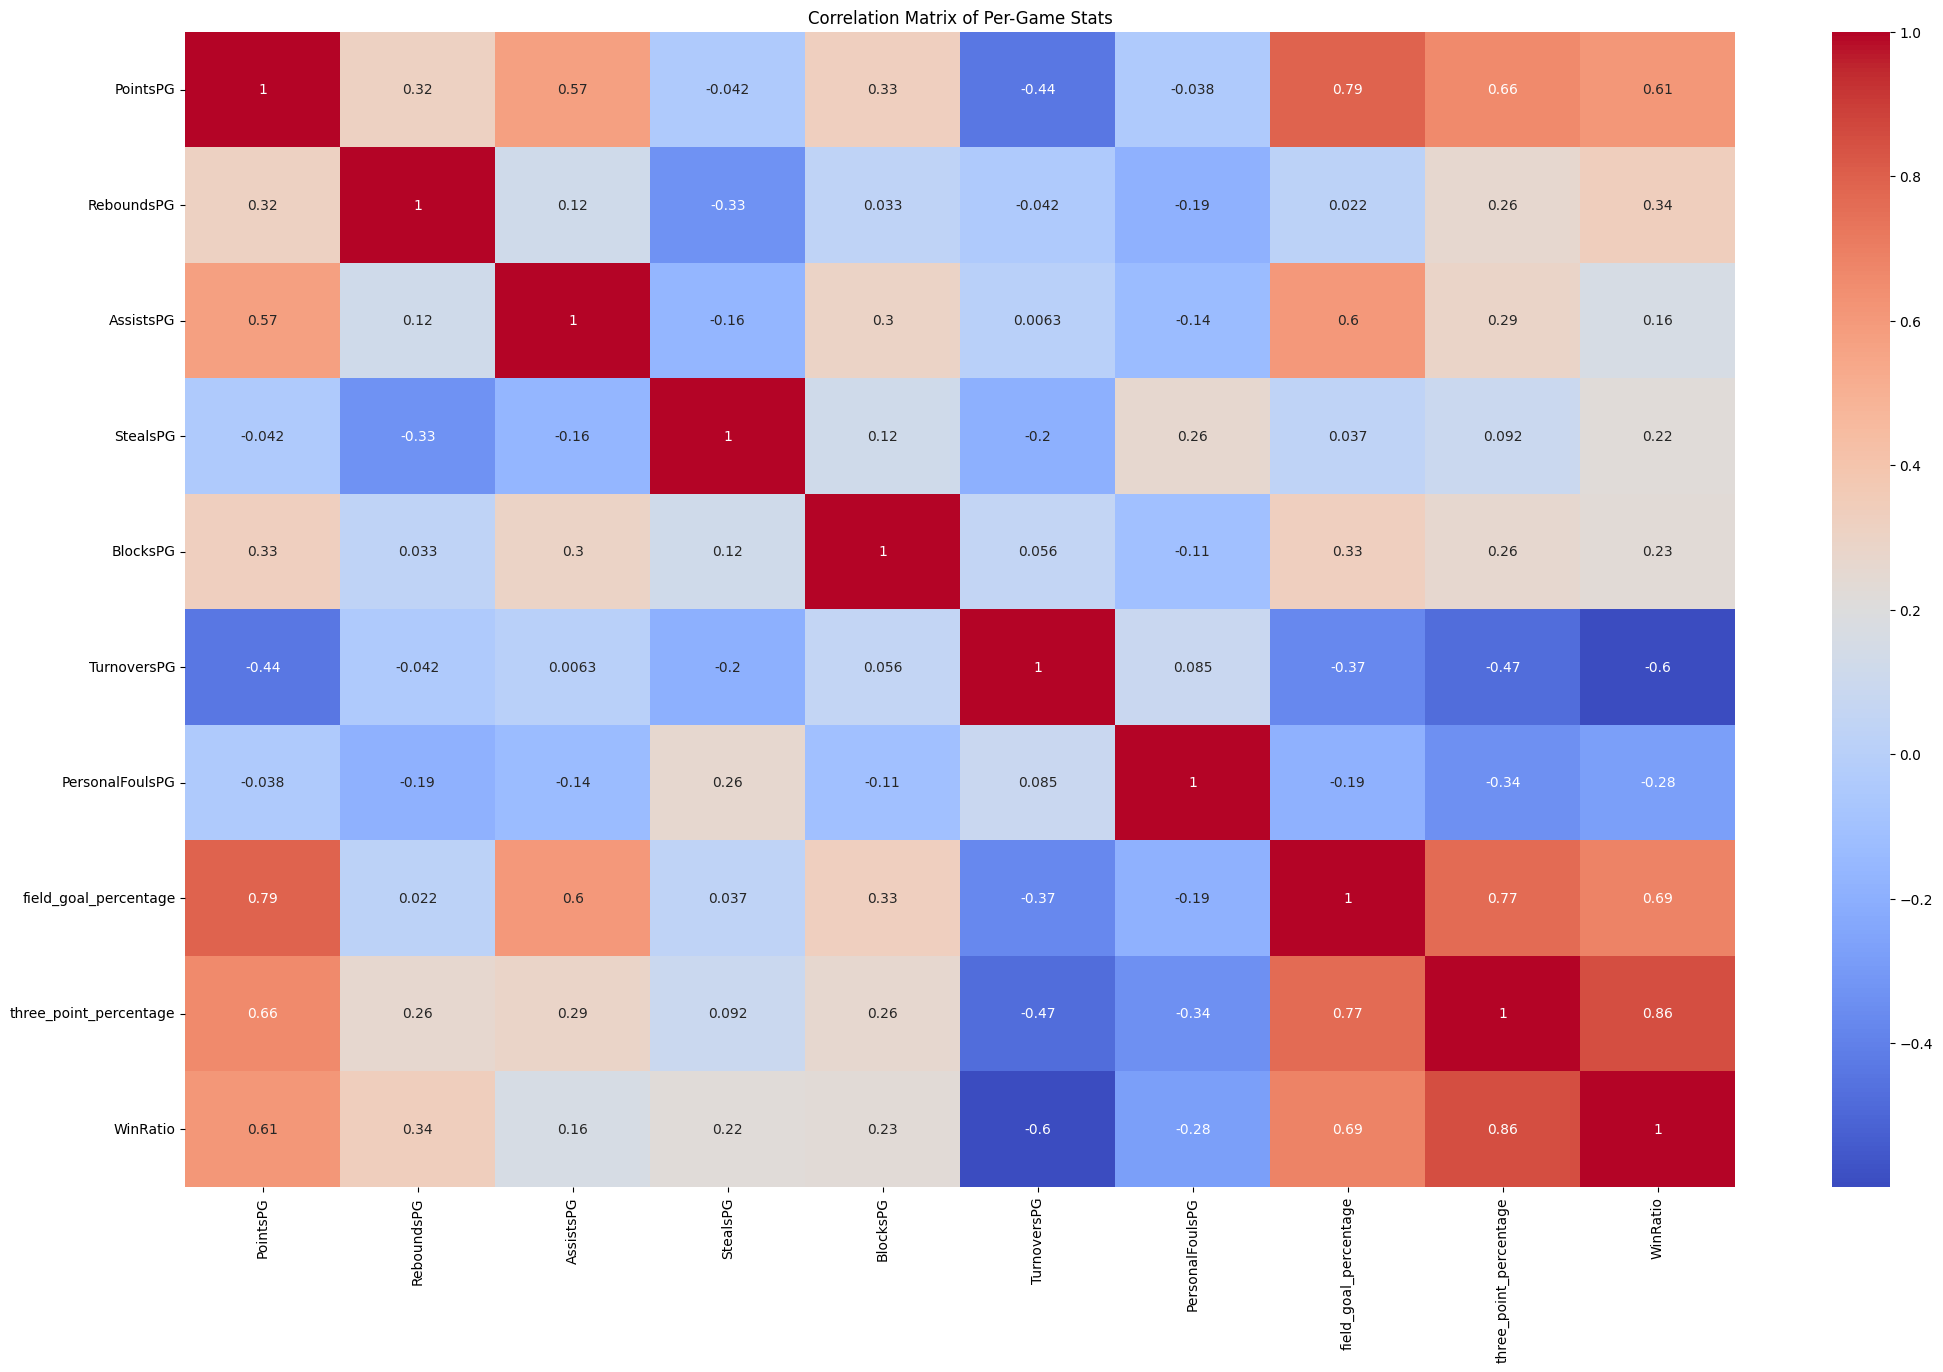

In [ ]:
#correlation matrix only per game stats
correlation_matrix = NBA_NC[['PointsPG',
       'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG', 'TurnoversPG',
       'PersonalFoulsPG', 'field_goal_percentage',  'three_point_percentage' , 'WinRatio']].corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Per-Game Stats')
plt.show()

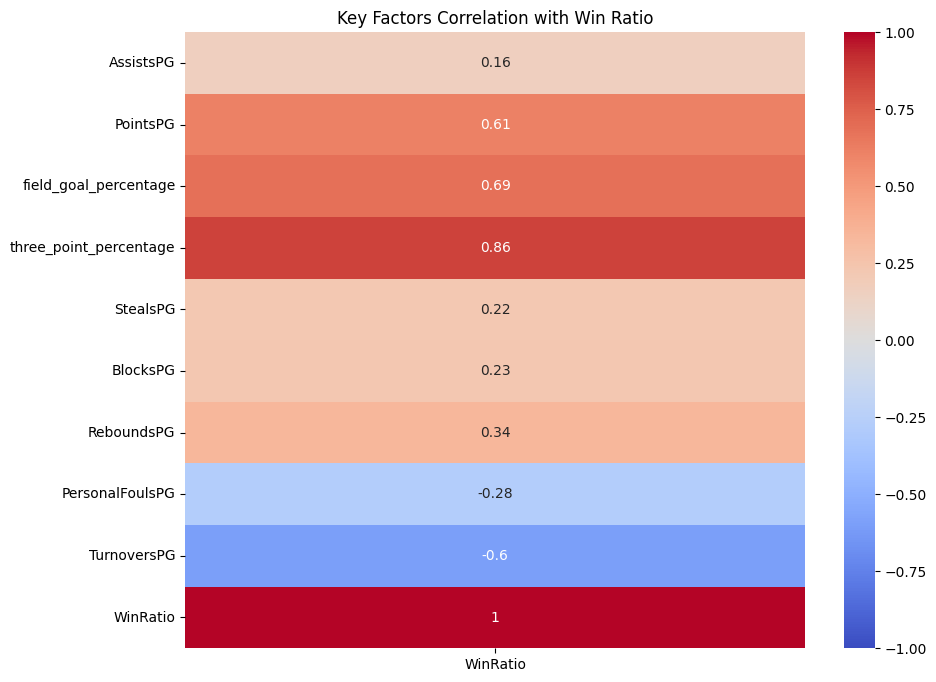

In [ ]:
#key factors that make a team succesfull
#correlation with Win Ratio

## ALSO Talk about how this is apart of the cleaning process, went from huge heatmap that is confusing to heatmap that is summarized and makes more sense
#ALSO talk about using per game stats

key_factors = ['AssistsPG','PointsPG', 'field_goal_percentage', 'three_point_percentage', 'StealsPG','BlocksPG', 'ReboundsPG', 'PersonalFoulsPG','TurnoversPG', 'WinRatio']

correlation_matrix = NBA[key_factors].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['WinRatio']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Key Factors Correlation with Win Ratio')
plt.show()


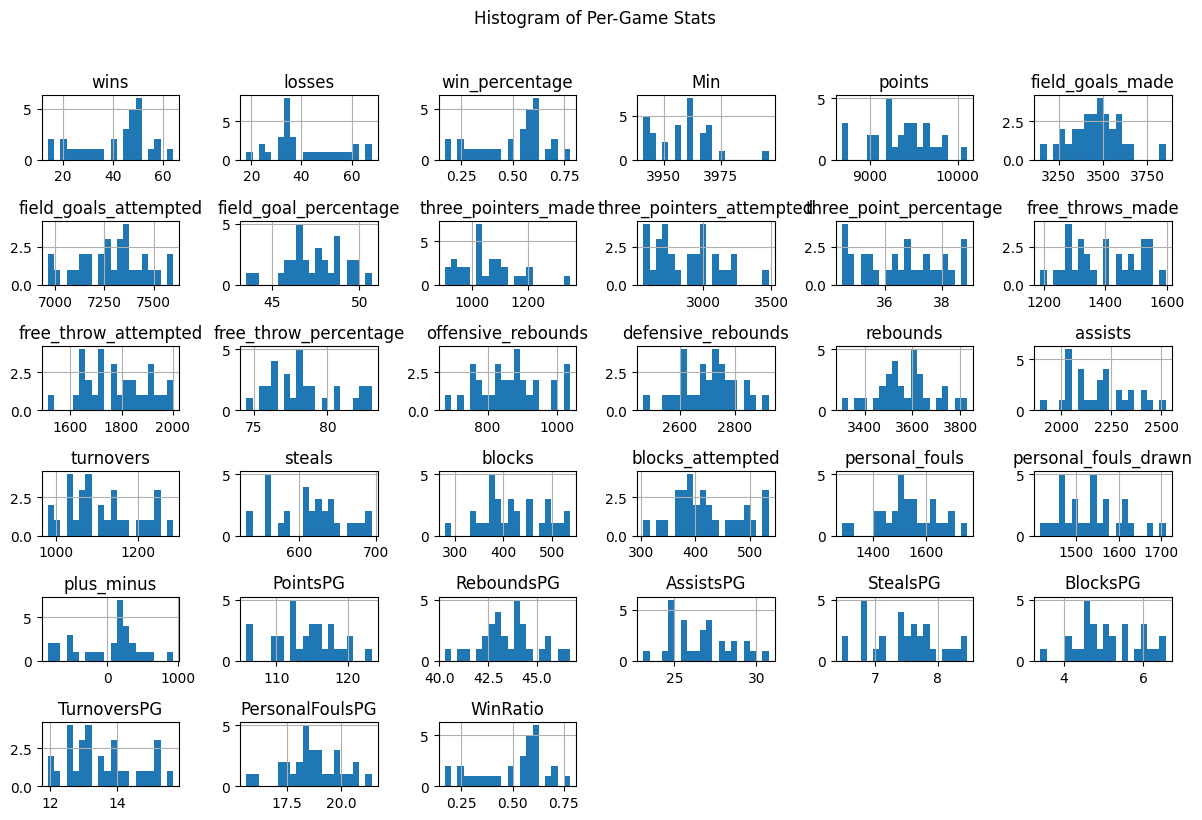

In [ ]:
#Histogram showing distribution of per game stats
NBA[['wins', 'losses',
       'win_percentage', 'Min', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds',
       'blocks_attempted', 'personal_fouls_drawn', 'plus_minus', 'PointsPG',
       'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG', 'TurnoversPG',
       'PersonalFoulsPG', 'WinRatio']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Per-Game Stats', y=1.02)
plt.tight_layout()
plt.show()

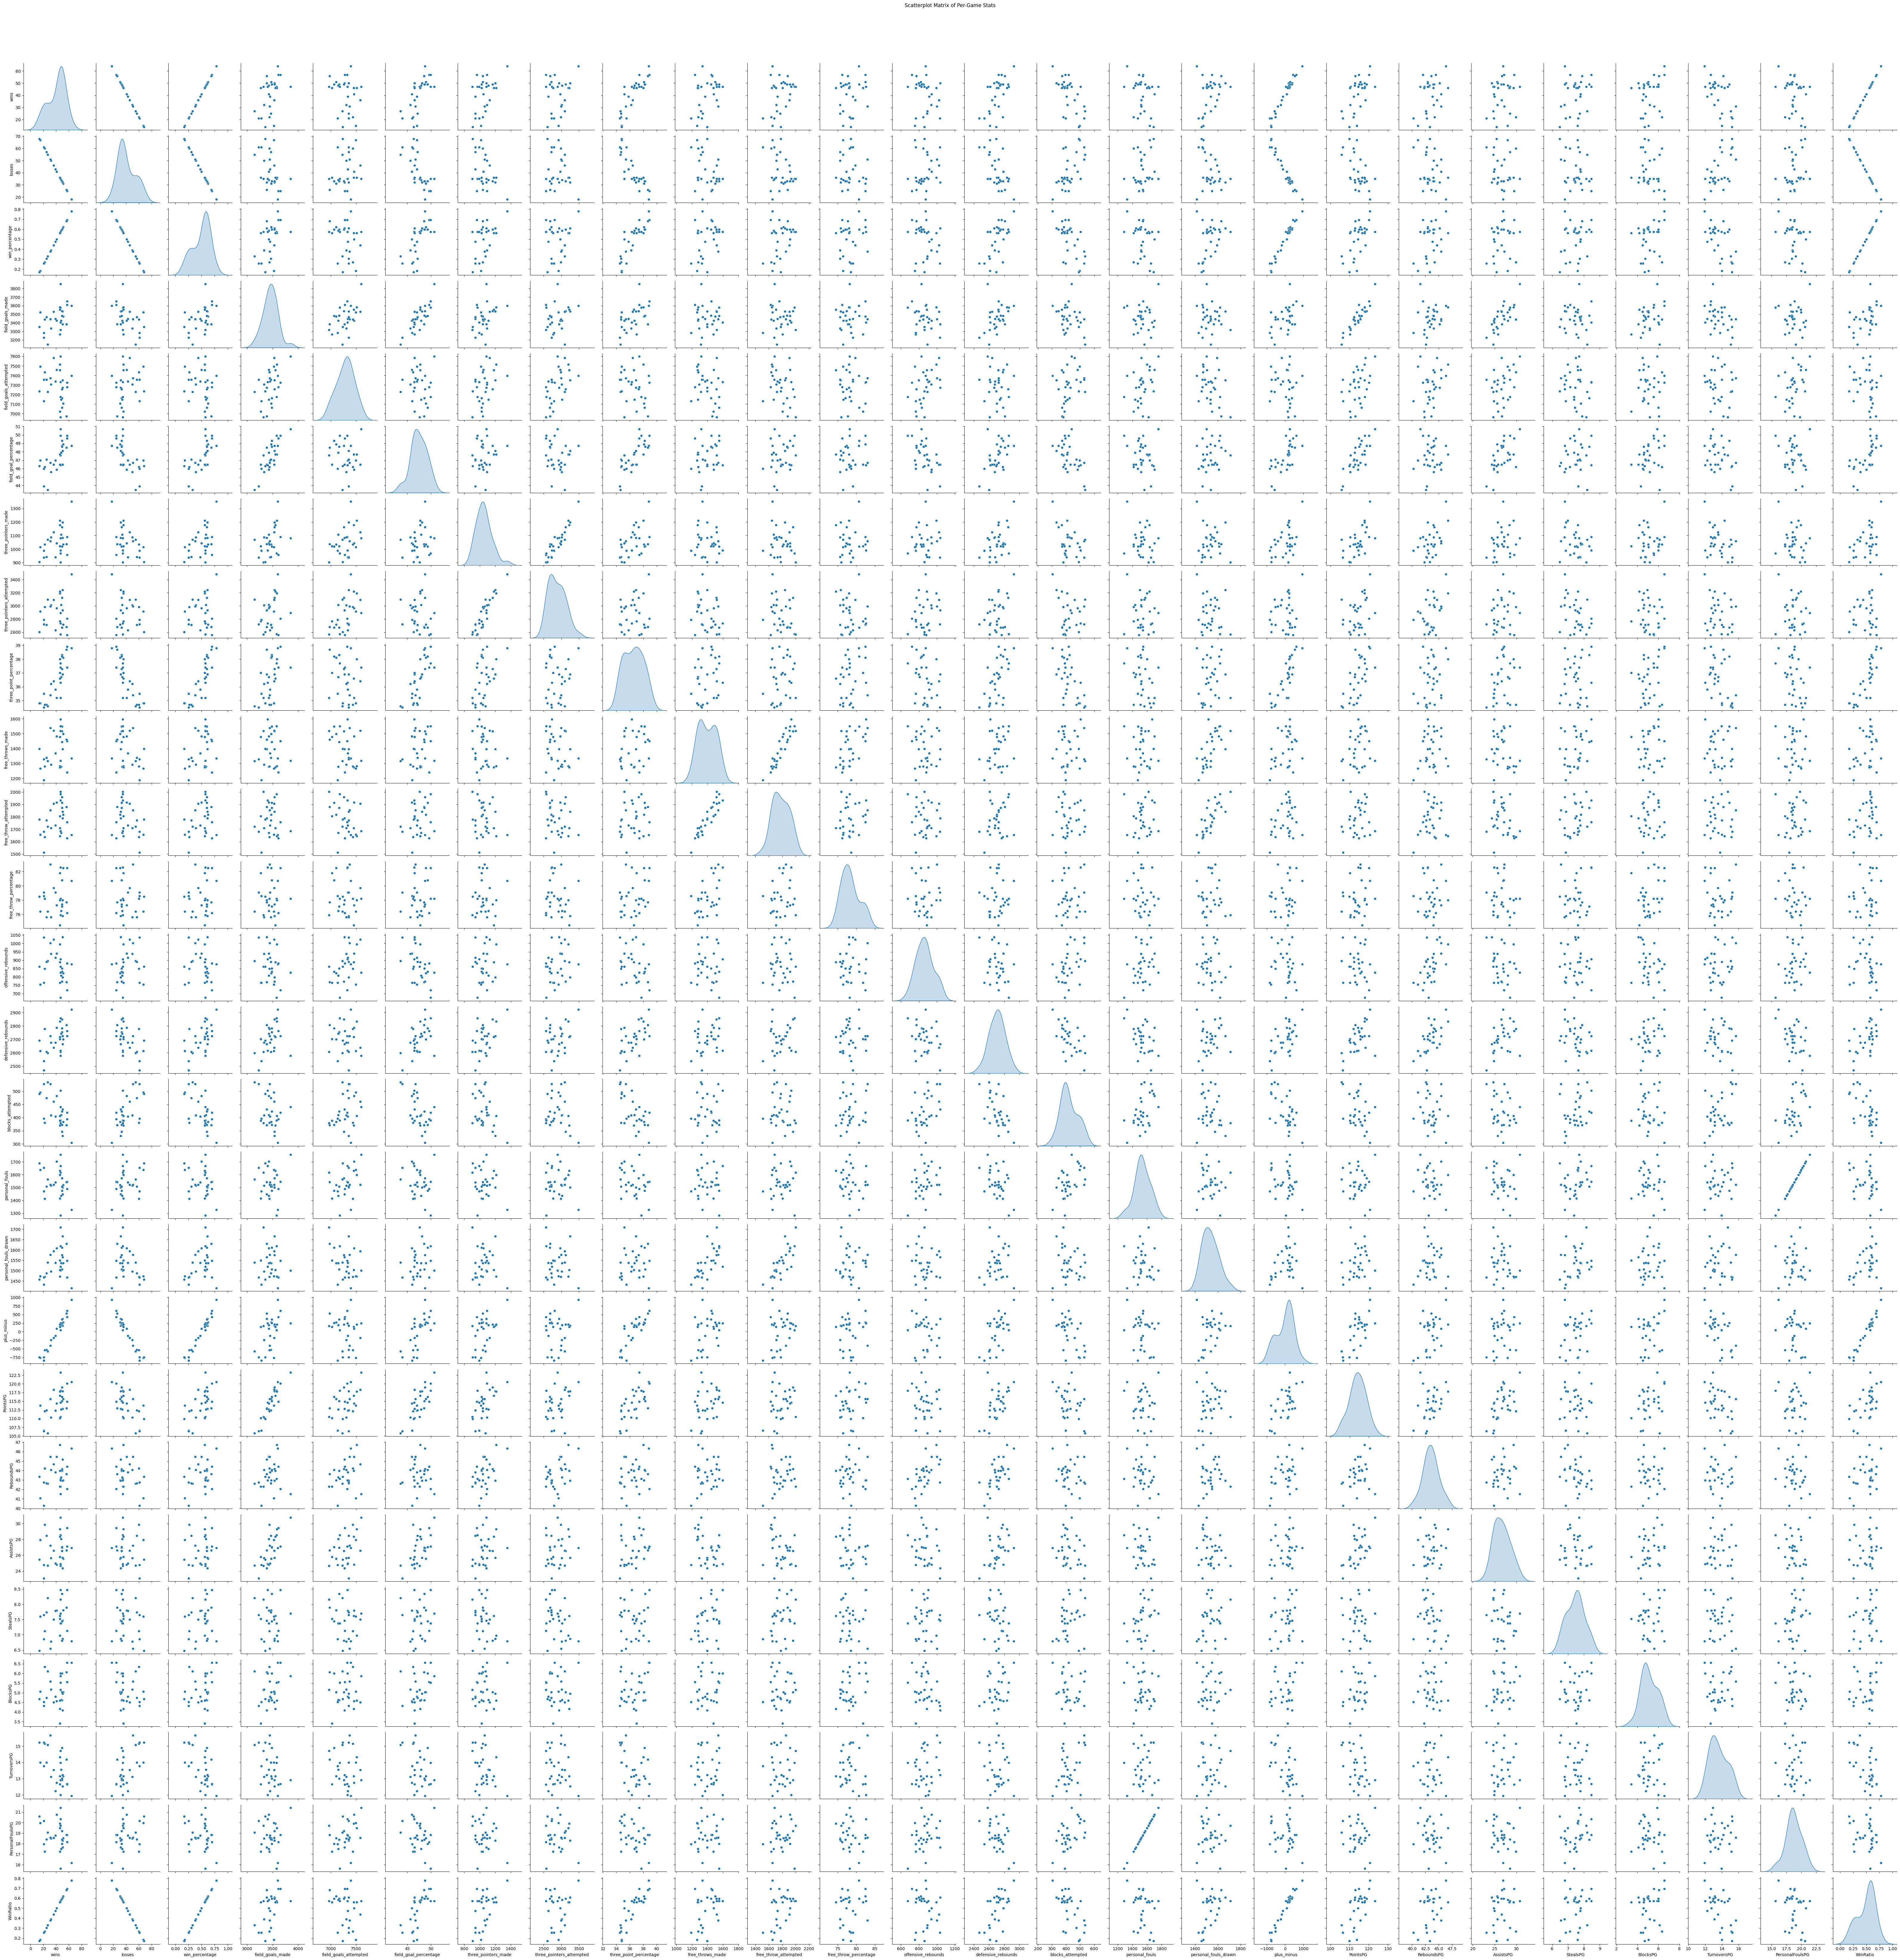

In [ ]:
#scatterplots showing per game relationships
sns.pairplot(NBA[['wins', 'losses',
       'win_percentage', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds',
       'blocks_attempted', 'personal_fouls_drawn', 'plus_minus', 'PointsPG',
       'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG', 'TurnoversPG',
       'PersonalFoulsPG', 'WinRatio']], diag_kind='kde')
plt.suptitle('Scatterplot Matrix of Per-Game Stats', y=1.02)
plt.show()

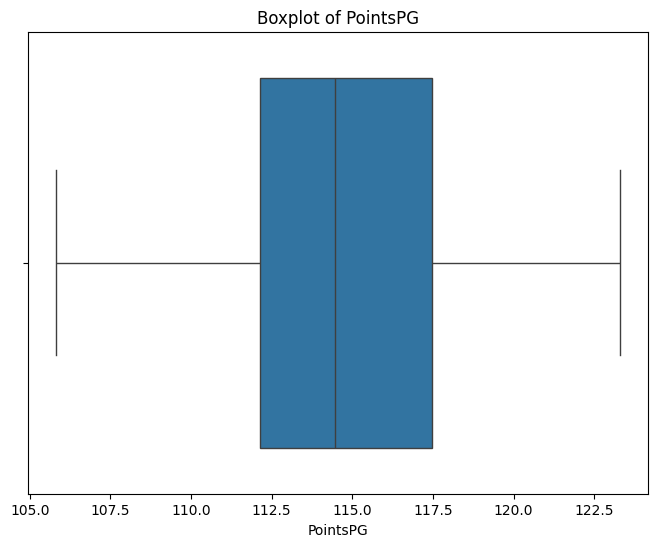

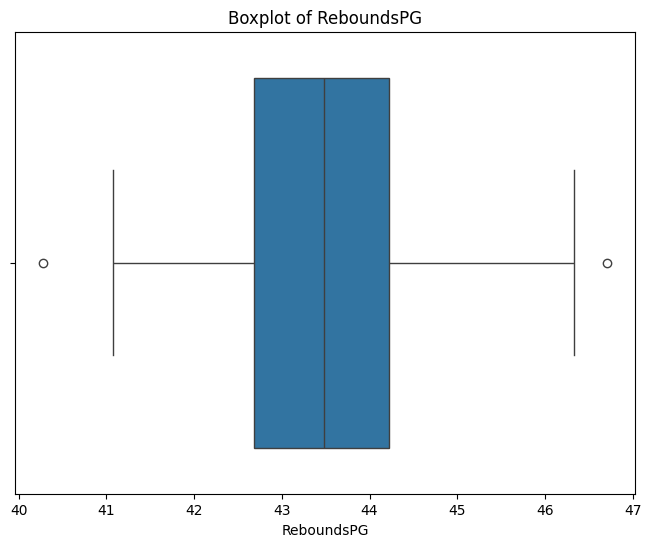

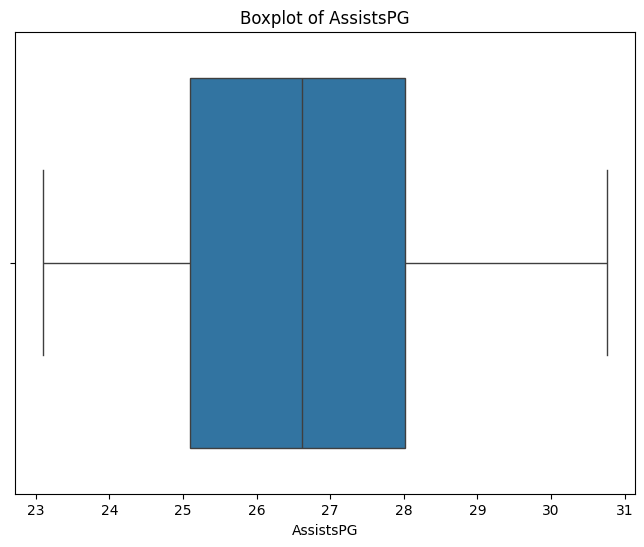

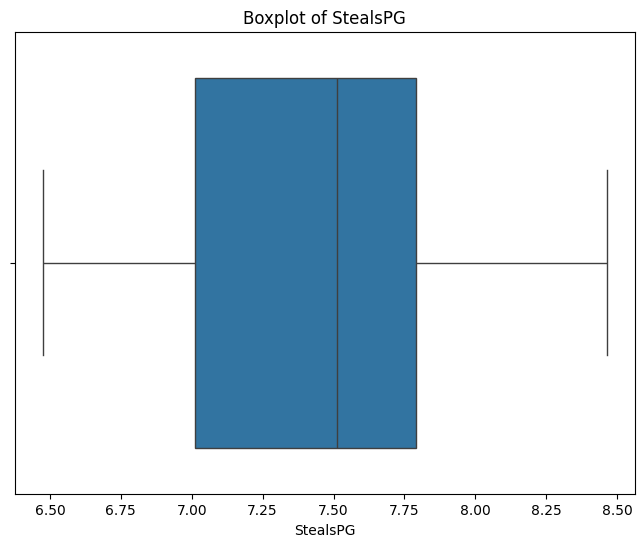

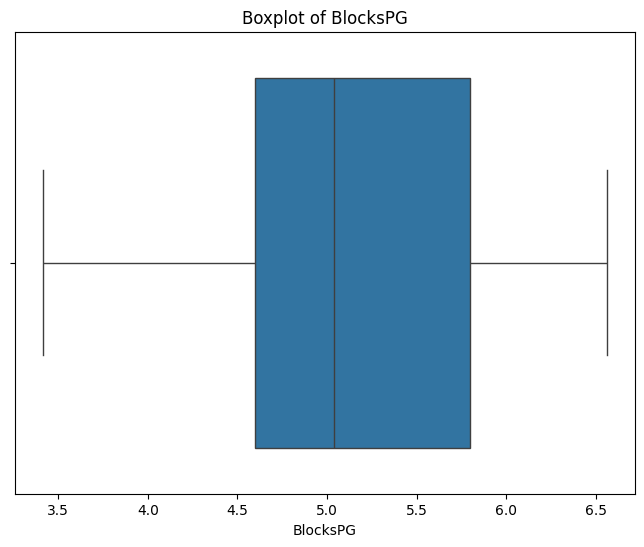

In [ ]:
#boxplots showing outliers

for col in ['PointsPG', 'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=NBA[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

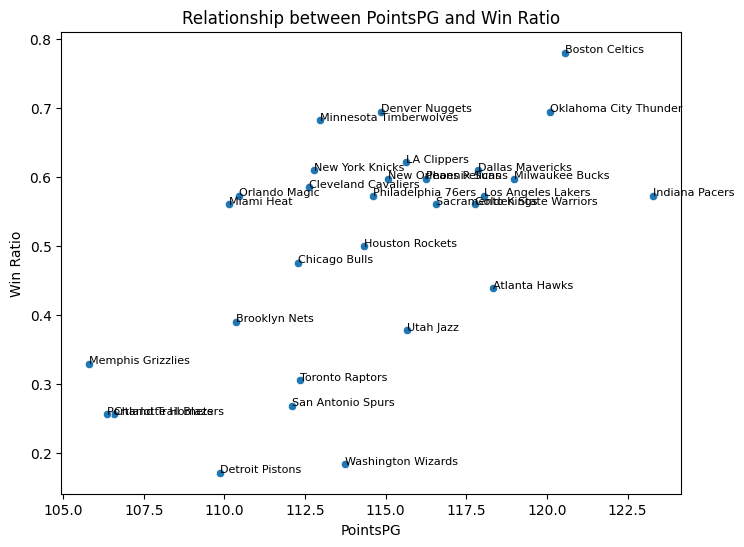

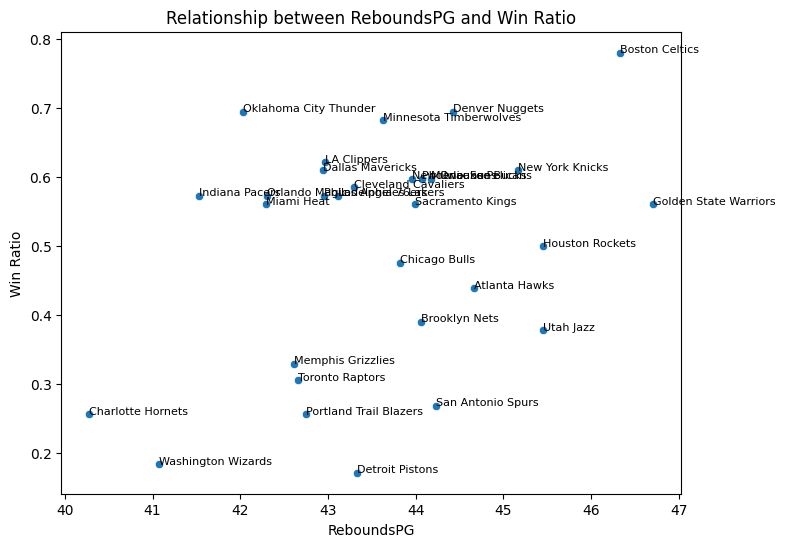

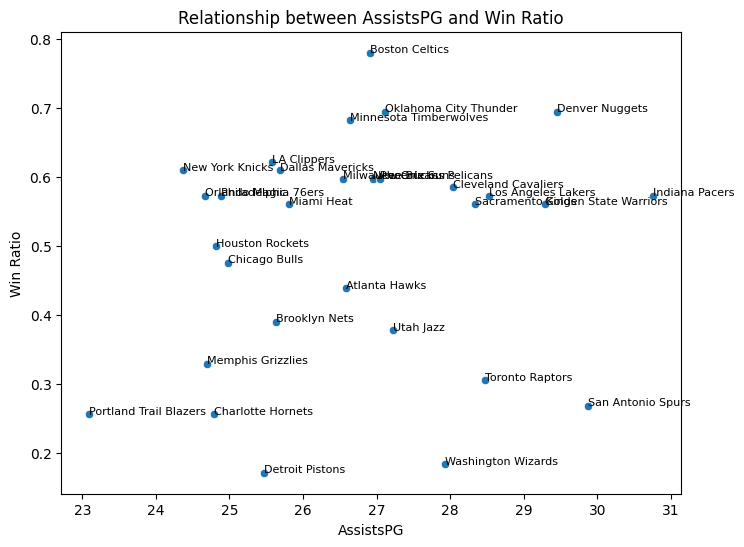

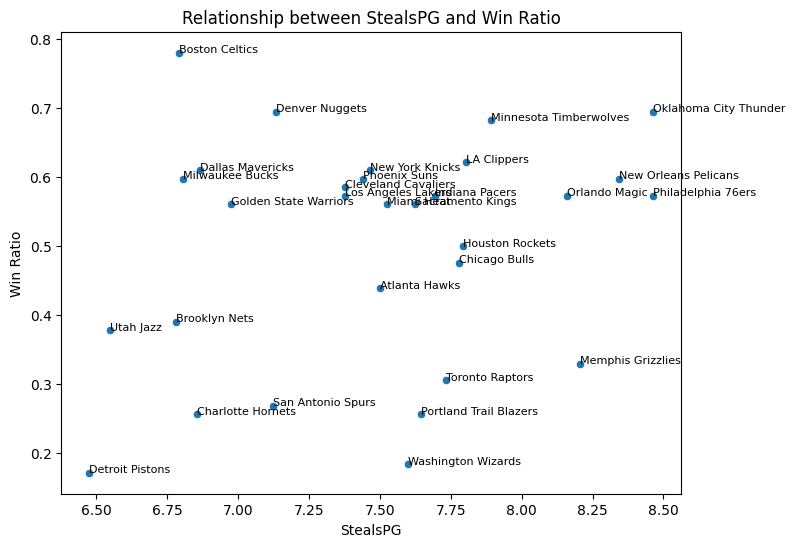

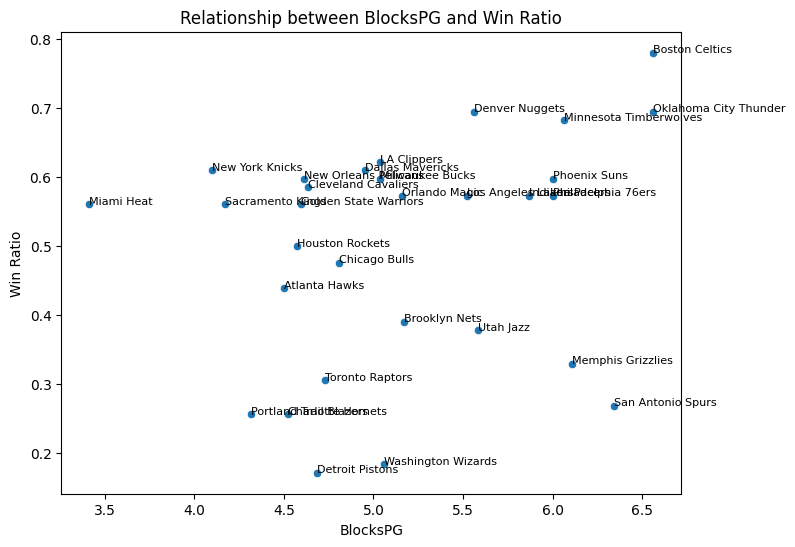

In [ ]:
#Relationships that show success from stats

for col in ['PointsPG', 'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=NBA[col], y=NBA['WinRatio'])

    for i in range(NBA.shape[0]):
        plt.text(NBA[col][i], NBA['WinRatio'][i], NBA['Team'][i], fontsize=8)

    plt.title(f'Relationship between {col} and Win Ratio')
    plt.xlabel(col)
    plt.ylabel('Win Ratio')
    plt.show()

PCA Section

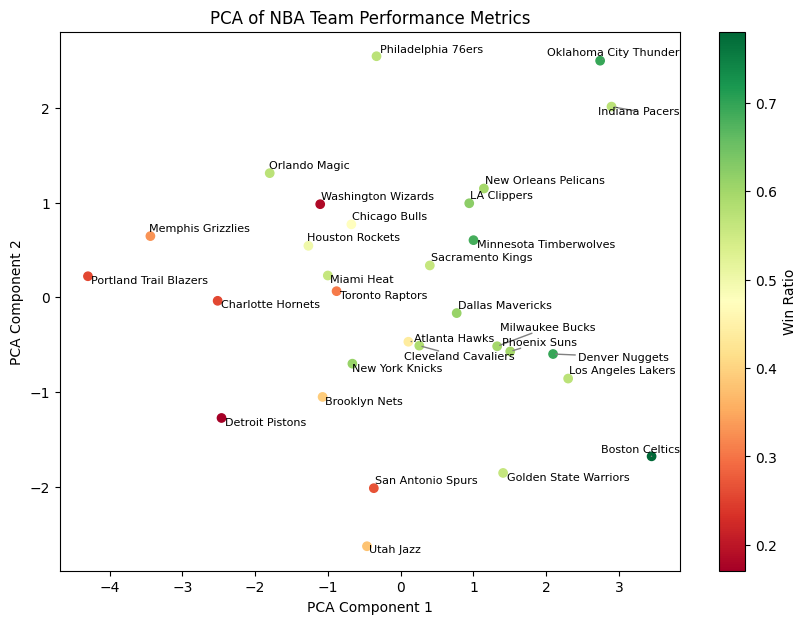

Explained variance ratio of each component: [0.37231993 0.17147577]


In [ ]:
# Select the performance metrics columns
columns = ['PointsPG', 'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG',
           'field_goal_percentage', 'three_point_percentage', 'TurnoversPG', 'PersonalFoulsPG']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(NBA_NC[columns])

# Apply PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data_scaled)

# Plot the PCA result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=NBA['WinRatio'], cmap='RdYlGn', marker='o')
plt.colorbar(scatter, label='Win Ratio')

texts = []
for i, team in enumerate(NBA['Team']):
    texts.append(plt.text(pca_transformed[i, 0], pca_transformed[i, 1], team, fontsize=8))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.title('PCA of NBA Team Performance Metrics')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print explained variance ratio to understand the importance of each component
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

In [ ]:
# Loadings from PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data_scaled)

# Create a DataFrame to display the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PCA Component 1', 'PCA Component 2'], index=columns)

print("Loadings for each principal component:")
print(loadings)

Loadings for each principal component:
                        PCA Component 1  PCA Component 2
PointsPG                       0.488267         0.032745
ReboundsPG                     0.163534        -0.490215
AssistsPG                      0.350211        -0.166194
StealsPG                      -0.014665         0.676985
BlocksPG                       0.234259         0.056381
field_goal_percentage          0.493939         0.123706
three_point_percentage         0.462854         0.079203
TurnoversPG                   -0.264060        -0.324888
PersonalFoulsPG               -0.170807         0.377333


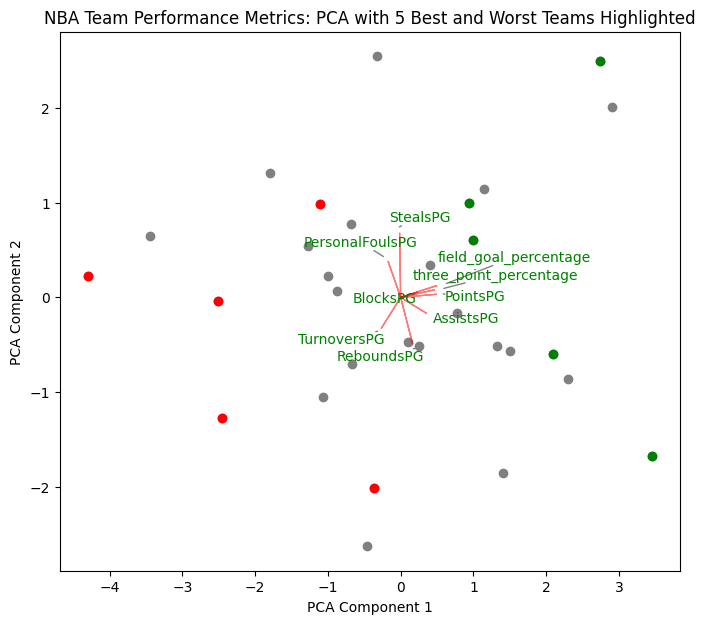

In [ ]:
# Sort teams by WinRatio
sorted_teams = NBA.sort_values(by='WinRatio', ascending=False)

# Get top 5 and bottom 5 teams
top_5_teams = sorted_teams.head(5)
bottom_5_teams = sorted_teams.tail(5)

# Plot the PCA result with loadings as vectors
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

# Plot all teams as grey dots initially
scatter = ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c='grey', marker='o')

# Highlight top 5 teams in green
top_5_indices = NBA.index[NBA['Team'].isin(top_5_teams['Team'])]
ax.scatter(pca_transformed[top_5_indices, 0], pca_transformed[top_5_indices, 1], c='green', marker='o')

# Highlight bottom 5 teams in red
bottom_5_indices = NBA.index[NBA['Team'].isin(bottom_5_teams['Team'])]
ax.scatter(pca_transformed[bottom_5_indices, 0], pca_transformed[bottom_5_indices, 1], c='red', marker='o')

# Set labels for the axes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')

# Plot the loadings as vectors with adjusted positions to mitigate overlap
texts = []
for k in range(len(columns)):
    ax.arrow(0, 0, pca.components_[0, k], pca.components_[1, k], color='r', alpha=0.5)
    texts.append(ax.text(pca.components_[0, k] * 1.2, pca.components_[1, k] * 1.1, columns[k], color='g', ha='center', va='center'))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.title('NBA Team Performance Metrics: PCA with 5 Best and Worst Teams Highlighted')
plt.show()

In [ ]:
# Create the effects DataFrame
effects = pd.DataFrame(data_scaled, columns=columns)
effects['Team'] = NBA['Team']

# Merge the effects DataFrame with the NBA DataFrame on the 'Team' column
effects = effects.merge(NBA[['Team', 'WinRatio']], on='Team')

# Filter the results by WinRatio
effects_sorted = effects.sort_values(by='WinRatio', ascending=False)

print("Effect of each feature on each team (in standard deviations), sorted by WinRatio:")
print(effects_sorted)

Effect of each feature on each team (in standard deviations), sorted by WinRatio:
    PointsPG  ReboundsPG  AssistsPG  StealsPG  BlocksPG  \
0   1.520822    1.947754   0.133578 -1.252420  1.833922   
2   1.404209   -1.051412   0.240618  1.817017  1.833922   
1   0.153540    0.618578   1.525105 -0.625090  0.541984   
3  -0.295418    0.056234  -0.020293  0.763999  1.187953   
4   0.337205   -0.403865  -0.602326  0.607166 -0.135496   
5   0.870707   -0.420906  -0.542116 -1.117992 -0.245783   
6  -0.339148    1.138320  -1.264639 -0.020164 -1.348658   
7   1.138916    0.439650  -0.073813 -1.230016 -0.135496   
8   0.206015    0.294804   0.153648  1.592971 -0.686933   
9   0.485885    0.371488   0.207168 -0.064973  1.109176   
10 -0.377047   -0.173815   0.749061 -0.176997 -0.655422   
11  2.170936   -1.409267   2.240938  0.405524  0.935868   
12  0.914436   -0.301621   1.016662 -0.176997  0.494718   
13 -0.895973   -0.863964  -1.097389  1.256901  0.022057   
14  0.092318   -0.412385  -0.9769

Hierarchical Clustering Section

In [ ]:
#Hierarchical-clustering Section
print(NBA.columns)

Index(['teamstatspk', 'Team', 'games_played', 'wins', 'losses',
       'win_percentage', 'Min', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season', 'PointsPG',
       'ReboundsPG', 'AssistsPG', 'StealsPG', 'BlocksPG', 'TurnoversPG',
       'PersonalFoulsPG', 'WinRatio'],
      dtype='object')


In [ ]:
#Standardizing the data first
#columns = ['PointsPG', 'BlocksPG']
columns = ['PointsPG', 'ReboundsPG']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(NBA[columns])

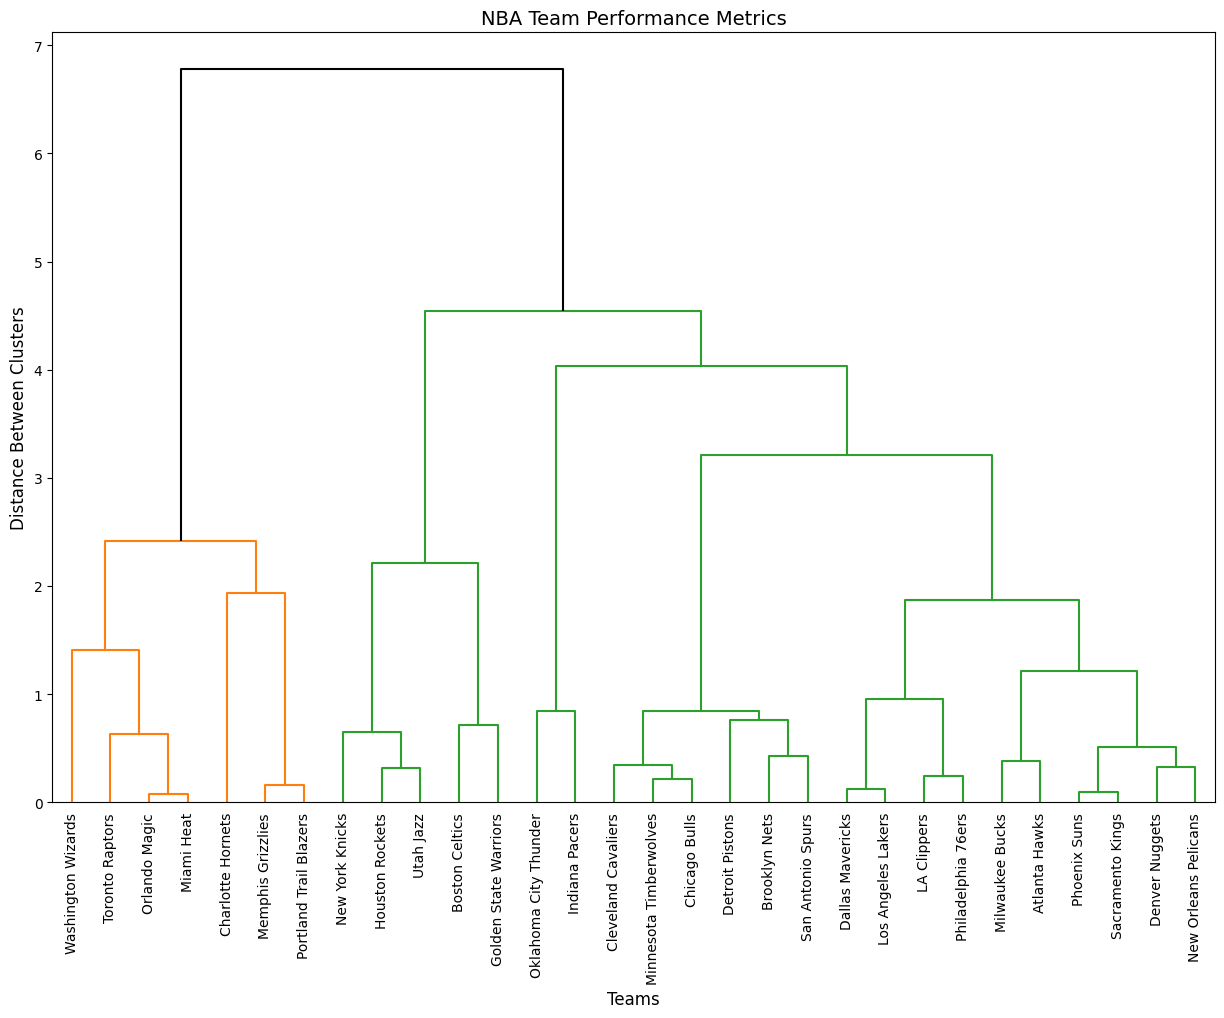

In [ ]:
hierarchical_cluster = linkage(data_scaled, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(hierarchical_cluster,
           labels=NBA['Team'].values,
           leaf_rotation=90,
           above_threshold_color='black'

          )
plt.title('NBA Team Performance Metrics', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Distance Between Clusters', fontsize=12)
plt.show()

This dendrogram is analyzing the variances between each teams points per game and rebounds per game.

In [ ]:
#Assigning teams to each cluster based on their number of maximum clusters
max_clusters = 2
labels = fcluster(hierarchical_cluster, max_clusters, criterion='maxclust')
NBA['Cluster'] = labels

In [ ]:
#Looking at the charactaristics of each cluster
for i in range(1, max_clusters + 1):
    print(f"Cluster {i}:\n", NBA[NBA['Cluster'] == i])

Cluster 1:
     teamstatspk                    Team  games_played  wins  losses  \
13           13           Orlando Magic            82    47      35   
16           16              Miami Heat            82    46      36   
23           23       Memphis Grizzlies            82    27      55   
24           24         Toronto Raptors            82    25      57   
26           26       Charlotte Hornets            82    21      61   
27           27  Portland Trail Blazers            82    21      61   
28           28      Washington Wizards            82    15      67   

    win_percentage   Min  points  field_goals_made  field_goals_attempted  \
13           0.573  3956    9058              3318                   6964   
16           0.561  3951    9032              3266                   7022   
23           0.329  3956    8677              3145                   7229   
24           0.305  3961    9213              3466                   7356   
26           0.256  3946    8740  

In [ ]:
average_win_ratio = NBA.groupby('Cluster')['WinRatio'].mean()

average_win_ratio

Cluster
1    0.351916
2    0.545069
Name: WinRatio, dtype: float64

In [ ]:
# Accessing the original columns from the DataFrame 'NBA'
original_columns = NBA[columns].columns

# Printing the original columns
print(original_columns)

data_scaled_df = pd.DataFrame(data_scaled, columns=original_columns, index=NBA.index)

print(data_scaled_df.columns)

Index(['PointsPG', 'ReboundsPG'], dtype='object')
Index(['PointsPG', 'ReboundsPG'], dtype='object')


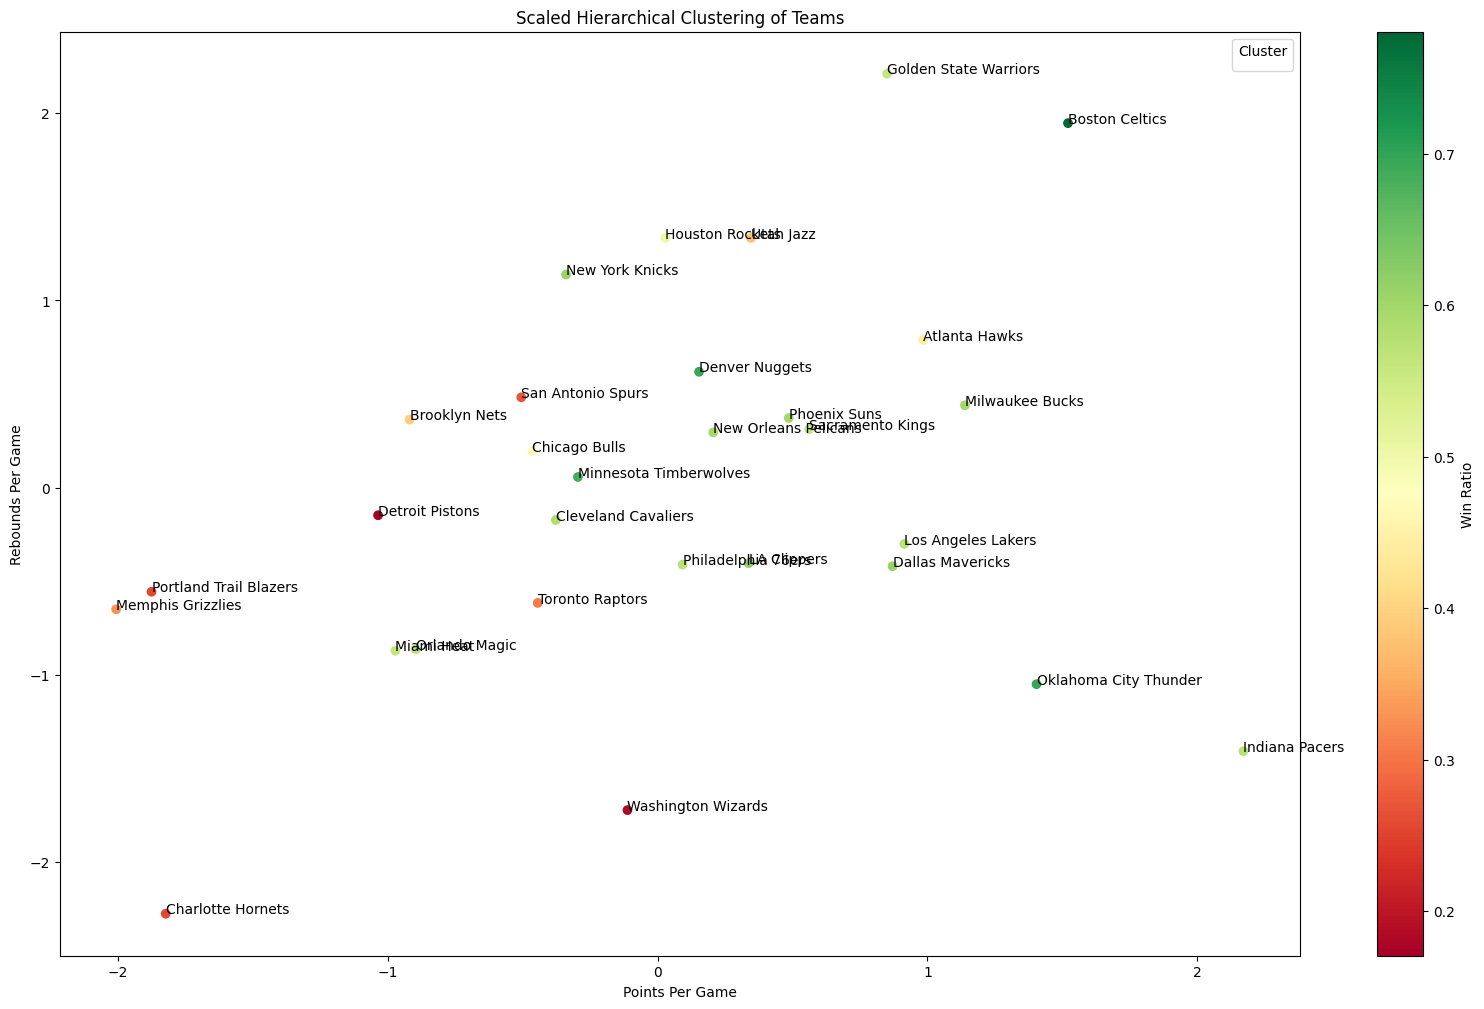

In [ ]:
# Scatter Plot
clusters = 2

labels = fcluster(hierarchical_cluster, clusters, criterion='maxclust')

NBA['Cluster_Hierarchical'] = labels

#Scatterplot
#plt.figure(figsize=(25,15))
#sccatter = sns.scatterplot(
  #  x = data_scaled[:, 0],
   # y = data_scaled[:, 1],
   # hue=NBA['Cluster_Hierarchical'],
   # palette="viridis",
  #  s=100
#)

plt.figure(figsize=(20, 12))
scatter = plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=NBA['WinRatio'], cmap='RdYlGn', marker='o')
plt.colorbar(scatter, label='Win Ratio')


for i, State in enumerate(NBA['Team']):
    plt.text(data_scaled[i, 0], data_scaled[i, 1], State)
plt.title("Scaled Hierarchical Clustering of Teams")
plt.xlabel("Points Per Game")
plt.ylabel("Rebounds Per Game")
plt.legend(title="Cluster")
plt.show()

In [ ]:
cluster_means = NBA.groupby('Cluster')[['PointsPG', 'ReboundsPG']].mean()

print("Average Performance Metrics for Each Cluster:")
print(cluster_means)

Average Performance Metrics for Each Cluster:
           PointsPG  ReboundsPG
Cluster                        
1        109.353659   41.994774
2        115.689820   44.012195


In [ ]:
for cluster in NBA['Cluster'].unique():
    cluster_data = NBA[NBA['Cluster'] == cluster]

    X = cluster_data[['PointsPG', 'ReboundsPG']]
    y = cluster_data['WinRatio']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    print(f"Cluster {cluster}:")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"R^2 Score: {r2_score(y, y_pred)}")
    print()

Cluster 2:
Coefficients: [0.02261751 0.0041417 ]
Intercept: -2.2538322943525615
R^2 Score: 0.29236887871773176

Cluster 1:
Coefficients: [0.00391813 0.06322378]
Intercept: -2.7316133705755012
R^2 Score: 0.1527767261597215



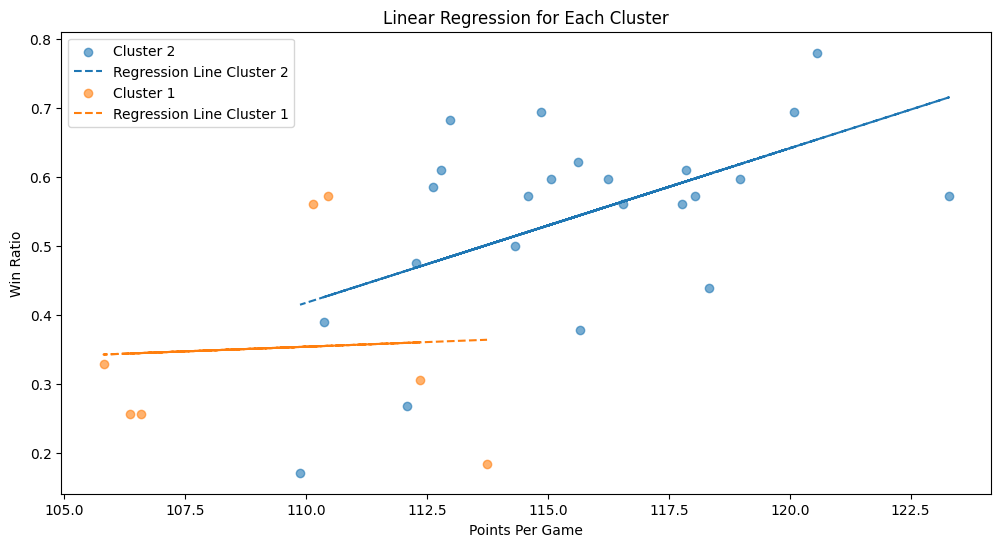

In [ ]:
plt.figure(figsize=(12, 6))
for cluster in NBA['Cluster'].unique():
    cluster_data = NBA[NBA['Cluster'] == cluster]

    X = cluster_data[['PointsPG', 'ReboundsPG']]
    y = cluster_data['WinRatio']

    plt.scatter(X['PointsPG'], y, label=f'Cluster {cluster}', alpha=0.6)


    X_vals = X['PointsPG'].values.reshape(-1, 1)
    y_vals = cluster_data['WinRatio']
    model = LinearRegression()
    model.fit(X_vals, y_vals)
    plt.plot(X_vals, model.predict(X_vals), linestyle='--', label=f'Regression Line Cluster {cluster}')

plt.xlabel('Points Per Game')
plt.ylabel('Win Ratio')
plt.title('Linear Regression for Each Cluster')
plt.legend()
plt.show()

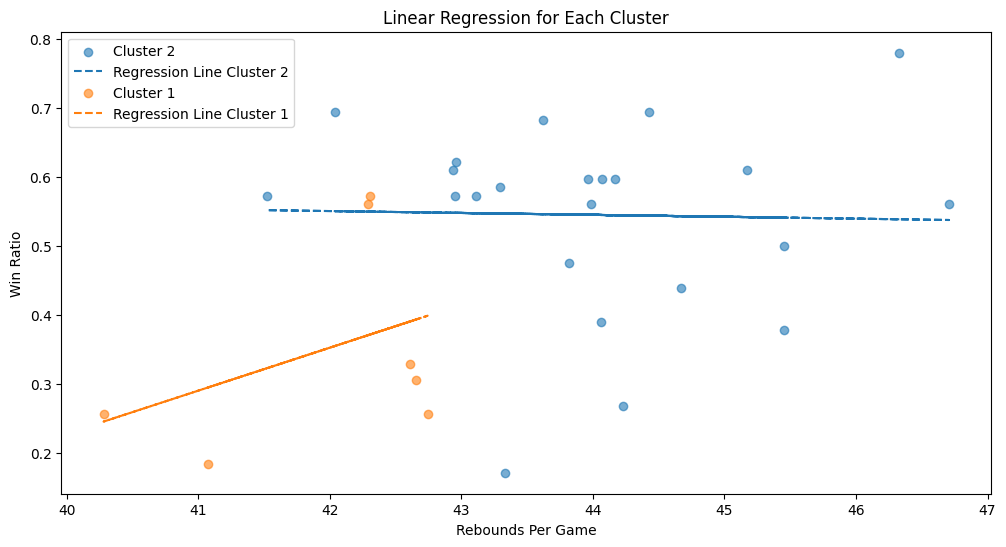

In [ ]:
plt.figure(figsize=(12, 6))
for cluster in NBA['Cluster'].unique():
    cluster_data = NBA[NBA['Cluster'] == cluster]

    X = cluster_data[['PointsPG', 'ReboundsPG']]
    y = cluster_data['WinRatio']

    plt.scatter(X['ReboundsPG'], y, label=f'Cluster {cluster}', alpha=0.6)


    X_vals = X['ReboundsPG'].values.reshape(-1, 1)
    y_vals = cluster_data['WinRatio']
    model = LinearRegression()
    model.fit(X_vals, y_vals)
    plt.plot(X_vals, model.predict(X_vals), linestyle='--', label=f'Regression Line Cluster {cluster}')

plt.xlabel('Rebounds Per Game')
plt.ylabel('Win Ratio')
plt.title('Linear Regression for Each Cluster')
plt.legend()
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/DATA319_2024Fall_Final_Project_Team2_Code.ipynb

[NbConvertApp] Converting notebook /content/DATA319_2024Fall_Final_Project_Team2_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 4584771 bytes to /content/DATA319_2024Fall_Final_Project_Team2_Code.html
